<a href="https://colab.research.google.com/github/cassiceci13/MMSP607/blob/main/participation_week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [18]:
df1 = pd.read_csv('/content/drive/MyDrive/MSSP6070/Modules/week10/demographics.csv')
df1.head()

,Student ID,Name,Age,Gender,Major,Year,Interest
0,1,Angel,22,Female,MSSPDA,2026,food
1,2,Celia,24,Female,MSSPDA,2026,drink
2,3,Yolanda,23,Female,MSSPDA,2026,travel
3,4,Kelda,21,Female,MSSPDA,2026,photography
4,5,Alysa,22,Female,MSSPDA,2026,equestrian


In [19]:
df2 = pd.read_csv('/content/drive/MyDrive/MSSP6070/Modules/week10/Connections.csv')
df2.head()

,Student ID 1,Student ID 2,Connection Type
0,1,2,Classmate
1,1,3,Friend
2,1,4,Classmate
3,1,5,Friend
4,2,3,Classmate


In [24]:
import networkx as nx
import matplotlib.pyplot as plt

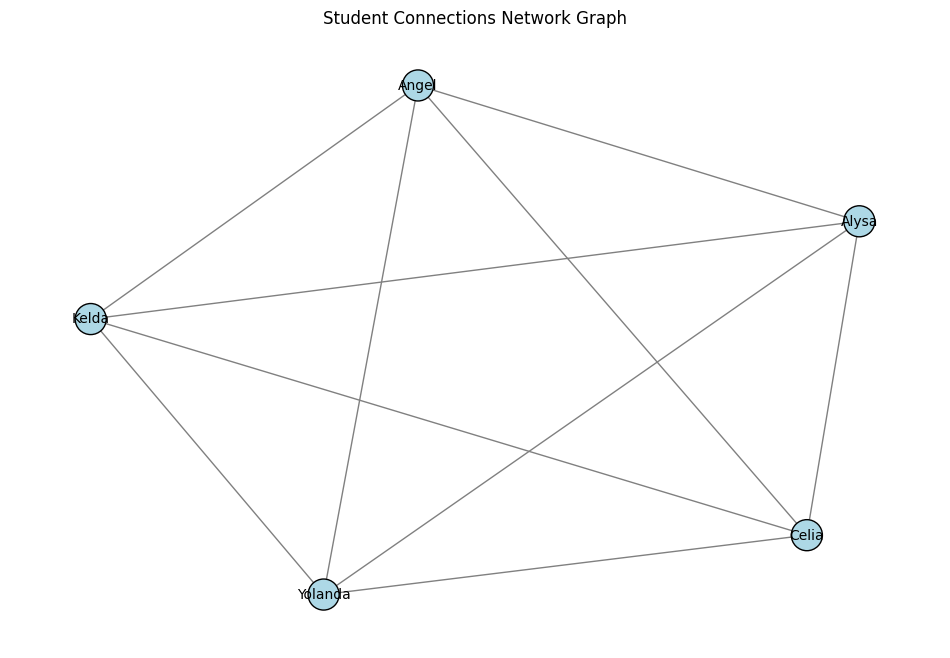

In [23]:
# Create an empty graph
G = nx.Graph()

# Add nodes with demographic attributes from the demographics DataFrame
for _, row in df1.iterrows():
    G.add_node(row['Student ID'], name=row['Name'], age=row['Age'], gender=row['Gender'],
               major=row['Major'], year=row['Year'], interest=row['Interest'])

# Add edges from the connections DataFrame
for _, row in df2.iterrows():
    G.add_edge(row['Student ID 1'], row['Student ID 2'], connection_type=row['Connection Type'].strip())

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning layout for the graph
node_colors = ['lightblue' if data['gender'] == 'Female' else 'lightgreen' for _, data in G.nodes(data=True)]

# Draw nodes with colors based on gender
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, edgecolors="black")
nx.draw_networkx_labels(G, pos, labels={n: data['name'] for n, data in G.nodes(data=True)}, font_size=10)
nx.draw_networkx_edges(G, pos, edge_color="gray")

# Add a title and display the graph
plt.title("Student Connections Network Graph")
plt.axis("off")
plt.show()
